In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['heart.csv']


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv ('../input/heart.csv')

In [4]:
data.shape

(303, 14)

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# the dataset is clean
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [8]:
data1=data.copy()

In [9]:
# from the data, we can see that there seems no clear 'outcome' information. 
#So test several basic features and also learn the number meanings from data description.
print('cp values are', data1['cp'].unique())
print('thal values are', data1['thal'].unique())
print('restecg values are', data1['restecg'].unique())
print('ca values are', data1['ca'].unique())

cp values are [3 2 1 0]
thal values are [1 2 3 0]
restecg values are [0 1 2]
ca values are [0 2 1 3 4]


In [10]:
# to make the column name more readable, such as 'target' means how narrow the coronary artery is.
data1=data1.rename(columns={'target': 'narrow', 'thal': 'duration', 'thalach':'max_HR', 
                      'fbs':'high_fasting_sugar', 'exang':'exercise_angina','ca': 'coronary_num'})

In [11]:
data1.sample(3)

,age,sex,cp,trestbps,chol,high_fasting_sugar,restecg,max_HR,exercise_angina,oldpeak,slope,coronary_num,duration,narrow
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
86,68,1,2,118,277,0,1,151,0,1.0,2,1,3,1
47,47,1,2,138,257,0,0,156,0,0.0,2,0,2,1


<function matplotlib.pyplot.show(*args, **kw)>

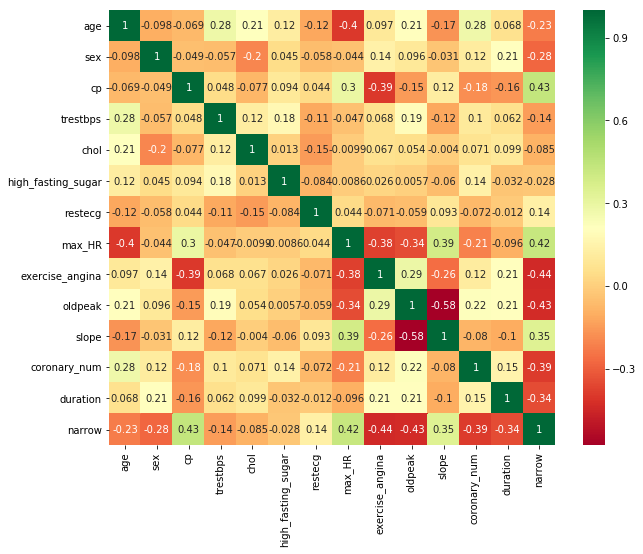

In [12]:
# Correlation test
sns.heatmap(data1.corr(),annot=True,cmap='RdYlGn') 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


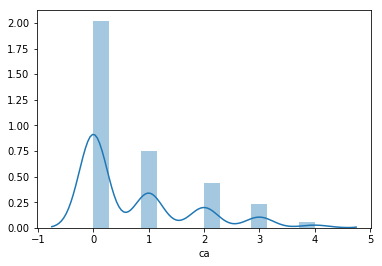

In [13]:
sns.distplot(data["ca"] )

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


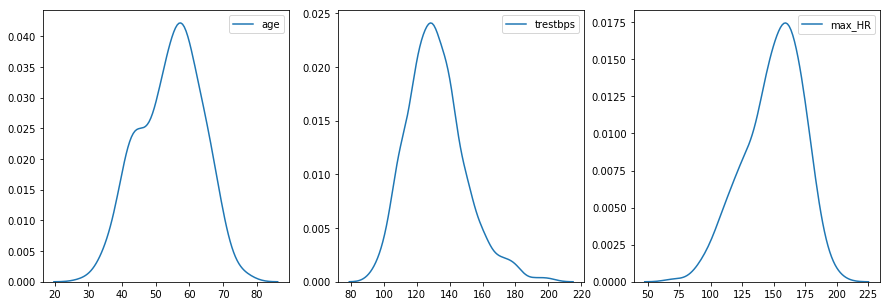

In [14]:
# distribution. 
fig, ax=plt.subplots(1,3, figsize=(15,5))
sns.kdeplot(data1['age'], ax=ax[0])
sns.kdeplot(data1['trestbps'], ax=ax[1])
sns.kdeplot(data1['max_HR'], ax=ax[2])

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
# set chest pain as the disease outcome
x=data1.drop(['cp'] , axis=1)
y=data1['cp']

In [17]:
# look at which features are important for the 'Outcome'
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x,y)
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

#remember that 'max_HR' has the highest score

max_HR                0.164941
chol                  0.132920
age                   0.127697
trestbps              0.120573
oldpeak               0.107153
narrow                0.083770
exercise_angina       0.062611
coronary_num          0.050031
duration              0.039333
slope                 0.035663
restecg               0.030148
sex                   0.025637
high_fasting_sugar    0.019524
dtype: float64

In [18]:
# Since we already set the 'outcome', some supervised models are considered
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics


In [19]:
Xtrain,Xtest, Ytrain, Ytest=train_test_split(x, y, test_size=0.2,random_state=42,stratify=y)
# split data to train and test parts

In [20]:
# evaluate the accuracies of the models
abc=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(Xtrain,Ytrain)
    prediction=model.predict(Xtest)
    abc.append(metrics.accuracy_score(prediction,Ytest))

models_dataframe=pd.DataFrame(abc,index=classifiers)   
models_dataframe

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,0
Linear Svm,0.606557
Radial Svm,0.475410
Logistic Regression,0.557377
KNN,0.459016
Decision Tree,0.409836


In [21]:
# More worse
# Maybe standarlization could help?
from sklearn.preprocessing import StandardScaler

In [22]:
features=x[x.columns[:13]]
features_standard=StandardScaler().fit_transform(features)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [23]:
data_std=pd.DataFrame(features_standard,columns=[[  'age', 'sex', 'trestbps', 'chol', 
                                                'high_fasting_sugar', 'restecg', 'max_HR',
                                                'exercise_angina', 'oldpeak', 'slope', 
                                                'coronary_num','duration','narrow' ]])

In [24]:
data_std.head(1)

,age,sex,trestbps,chol,high_fasting_sugar,restecg,max_HR,exercise_angina,oldpeak,slope,coronary_num,duration,narrow
0,0.952197,0.681005,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873,0.914529


In [25]:
# Notice that the highest score is only 0.6. Based on the feature score list, to 8 features have scores above 0.5. To see whether these important features will produce more accurate prediction
data_8=data1.loc[:, ['max_HR', 'chol', 'age', 'trestbps', 'oldpeak', 'narrow', 'exercise_angina', 'coronary_num']]
Xtrain,Xtest, Ytrain, Ytest=train_test_split(data_8, y, test_size=0.2,random_state=42,stratify=y)
abc8=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(Xtrain,Ytrain)
    prediction=model.predict(Xtest)
    abc8.append(metrics.accuracy_score(prediction,Ytest))

models_df8=pd.DataFrame(abc8,index=classifiers)   
models_df8

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


,0
Linear Svm,0.557377
Radial Svm,0.475410
Logistic Regression,0.557377
KNN,0.459016
Decision Tree,0.344262


In [26]:
# For other models, it seems improve a little. For the LInear Svm, not better.
# So look back at the data, whether we miss something?
# For 'cp' column, it records chest pain type. Number 3 mean no chest pain, number 0-2 means different tyoe of angina. So is it possible that this kind of recording makes the problem too complicated?
# To simplify it, I will group the number0-2 together as disease positive, number 3 as disease negative

In [27]:
data1['cp'].isin([0,1,2]).value_counts()

True     280
False     23
Name: cp, dtype: int64

In [28]:
# The dataset contain 23 ' disease negative' patient
data_mod=data.copy()

In [29]:
number=[0,1,2]
for col in data1.itertuples():

    if col.cp in number:
        data_mod['cp'].replace(to_replace=col.cp, value=1, inplace=True)


In [30]:
data_mod['cp'].value_counts()

1    280
3     23
Name: cp, dtype: int64

In [31]:
y_mod=data_mod['cp']
x.sample(3)

,age,sex,trestbps,chol,high_fasting_sugar,restecg,max_HR,exercise_angina,oldpeak,slope,coronary_num,duration,narrow
250,51,1,140,298,0,1,122,1,4.2,1,3,3,0
246,56,0,134,409,0,0,150,1,1.9,1,2,3,0
41,48,1,130,245,0,0,180,0,0.2,1,0,2,1


In [32]:
model= RandomForestClassifier(n_estimators=100,random_state=0)
model.fit(x,y_mod)
pd.Series(model.feature_importances_,index=x.columns).sort_values(ascending=False)

trestbps              0.150899
max_HR                0.143794
chol                  0.139885
age                   0.138263
oldpeak               0.135084
coronary_num          0.048837
narrow                0.046581
slope                 0.041936
exercise_angina       0.038660
duration              0.037065
restecg               0.033996
sex                   0.025498
high_fasting_sugar    0.019503
dtype: float64

In [33]:
Xtrain,Xtest, Ytrain, Ytest=train_test_split(data_std, y_mod, test_size=0.2,random_state=42,stratify=y)
abc_std=[]
classifiers=['Linear Svm','Radial Svm','Logistic Regression','KNN','Decision Tree']
models=[svm.SVC(kernel='linear'),svm.SVC(kernel='rbf'),LogisticRegression(),KNeighborsClassifier(n_neighbors=3),DecisionTreeClassifier()]
for i in models:
    model = i
    model.fit(Xtrain,Ytrain)
    prediction=model.predict(Xtest)
    abc_std.append(metrics.accuracy_score(prediction,Ytest))

models_df_std=pd.DataFrame(abc_std,index=classifiers)   
models_df_std

/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,0
Linear Svm,0.918033
Radial Svm,0.918033
Logistic Regression,0.934426
KNN,0.918033
Decision Tree,0.885246


In [34]:
# Wow! The accuracy is more than 90%?!
# IS that too good to be true?
# we look at the percentage of so called 'disease positve' patient, after we grouped number 0-2 together

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


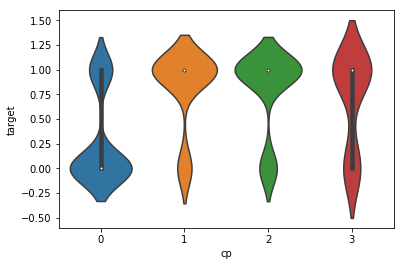

In [35]:
sns.violinplot(x=data['cp'], y=data['target'])